In [6]:
!pip install torch==2.2.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [10]:
!pip install transformers==4.32.1

Name: transformers
Version: 4.32.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /home/marius/anaconda3/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [19]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-large-en-v1.5')
model = AutoModel.from_pretrained('BAAI/bge-large-en-v1.5')

# Sample text
text = """
"File created:
RuleName: DLL
UtcTime: 2024-05-15 16:00:16.896
ProcessGuid: {18e8265a-da8c-6644-5a01-000000002700}
ProcessId: 6036
Image: C:\Program Files (x86)\Microsoft\EdgeUpdate\Install\{D1058E28-B2C1-4930-8BC3-EA038942C727}\EDGEMITMP_304C3.tmp\setup.exe
TargetFilename: C:\Program Files (x86)\Microsoft\EdgeCore\124.0.2478.97\onnxruntime.dll
CreationUtcTime: 2024-05-15 16:00:16.896"
2024-05-15T16:00:15.887Z,win10,fe80::24b4:3691:44a6:38a1,information,5379,User Account Management,"Credential Manager credentials were read.

Subject:
        Security ID:            S-1-5-18
        Account Name:           WIN10$
        Account Domain:         sec699-20
        Logon ID:               0x3E7
        Read Operation:         Enumerate Credentials

This event occurs when a user performs a read operation on stored credentials in Credential Manager."
"""

# Access the model's configuration
max_length = model.config.max_position_embeddings
print("Maximum length / number of tokens the model allows:", max_length)

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Count the number of tokens
num_tokens = len(tokens)
print("Number of tokens in the text:", num_tokens)

# Encode text
inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

# Get model output
with torch.no_grad():
    outputs = model(**inputs)

# Extract embeddings
cls_embedding = outputs.last_hidden_state[:, 0, :]  # Using the [CLS] token

# For mean pooling
mean_embedding = outputs.last_hidden_state.mean(dim=1)


Maximum length / number of tokens the model allows: 512
Number of tokens in the text: 301


In [22]:
import polars as pl
# Convert the tensor to a Polars DataFrame
df = pl.DataFrame(cls_embedding.numpy())

# Print the DataFrame
print(df)

shape: (1, 1_024)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ column_0  ┆ column_1  ┆ column_2  ┆ column_3 ┆ … ┆ column_10 ┆ column_10 ┆ column_10 ┆ column_10 │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ 20        ┆ 21        ┆ 22        ┆ 23        │
│ f32       ┆ f32       ┆ f32       ┆ f32      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆           ┆           ┆          ┆   ┆ f32       ┆ f32       ┆ f32       ┆ f32       │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ -0.208444 ┆ -0.327674 ┆ -0.032746 ┆ 0.461757 ┆ … ┆ 0.704677  ┆ -0.347134 ┆ -0.526733 ┆ -0.049645 │
└───────────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴───────────┴───────────┘


In [23]:
cls_embedding.shape

torch.Size([1, 1024])

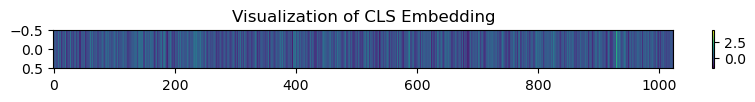

In [20]:
import matplotlib.pyplot as plt
import torch

# Example tensor, replace with cls_embedding
# cls_embedding = torch.randn(1, 768)  # Simulating an embedding tensor

# Plotting the tensor values
plt.figure(figsize=(10, 0.5))
plt.imshow(cls_embedding, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Visualization of CLS Embedding")
plt.show()